In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
import scipy
from scipy.io.wavfile import write
from scipy.fft import fft, fftfreq
import itertools
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import gdown
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq

# Графики и спектры шума в зависимости от окна усреднения

In [2]:
SAMPLE_RATE = 1000  # Гц
DURATION = 15  # Секунды

df = pd.DataFrame({'x':np.random.normal(0,1,SAMPLE_RATE * (DURATION +1))})
for i in [2,3,4,5,10,15, 20, 50, 70, 100]:
    df['mean_'+str(i)] = df.x.rolling(window = i).mean()
df = df.dropna()
# Нормализация
for i in df.columns:
    df[i] = df[i]/np.abs(df[i]).max()
df = df.reset_index(drop = True)
df

,x,mean_2,mean_3,mean_4,mean_5,mean_10,mean_15,mean_20,mean_50,mean_70,mean_100
0,-0.050951,-0.160738,-0.269081,-0.358220,-0.514762,-0.160442,-0.138046,-0.052396,0.018014,-0.351669,-0.581604
1,0.127689,0.055042,-0.052070,-0.178666,-0.304542,-0.148017,-0.102808,0.035171,0.021539,-0.351465,-0.525973
2,-0.156755,-0.020848,-0.043216,-0.122076,-0.261018,-0.393875,-0.152948,-0.072316,-0.023167,-0.371323,-0.530300
3,0.211194,0.039047,0.098366,0.063254,-0.020777,-0.382202,-0.070694,-0.011401,-0.118239,-0.269697,-0.454040
4,-0.029163,0.130565,0.013651,0.073760,0.050500,-0.298180,-0.025011,-0.087186,-0.040887,-0.207012,-0.466623
...,...,...,...,...,...,...,...,...,...,...,...
15896,0.096453,-0.110360,-0.242087,-0.317816,-0.479058,-0.446866,-0.357750,-0.451664,-0.387925,-0.435161,-0.236574
15897,0.040188,0.098007,-0.061395,-0.196759,-0.306379,-0.292514,-0.287377,-0.400072,-0.410102,-0.419265,-0.227599
15898,0.361965,0.288450,0.269293,0.119725,-0.022811,-0.199231,-0.220636,-0.275272,-0.320467,-0.384090,-0.201189
15899,-0.015415,0.248568,0.208874,0.232993,0.115280,-0.236412,-0.252289,-0.244794,-0.354357,-0.445766,-0.217318


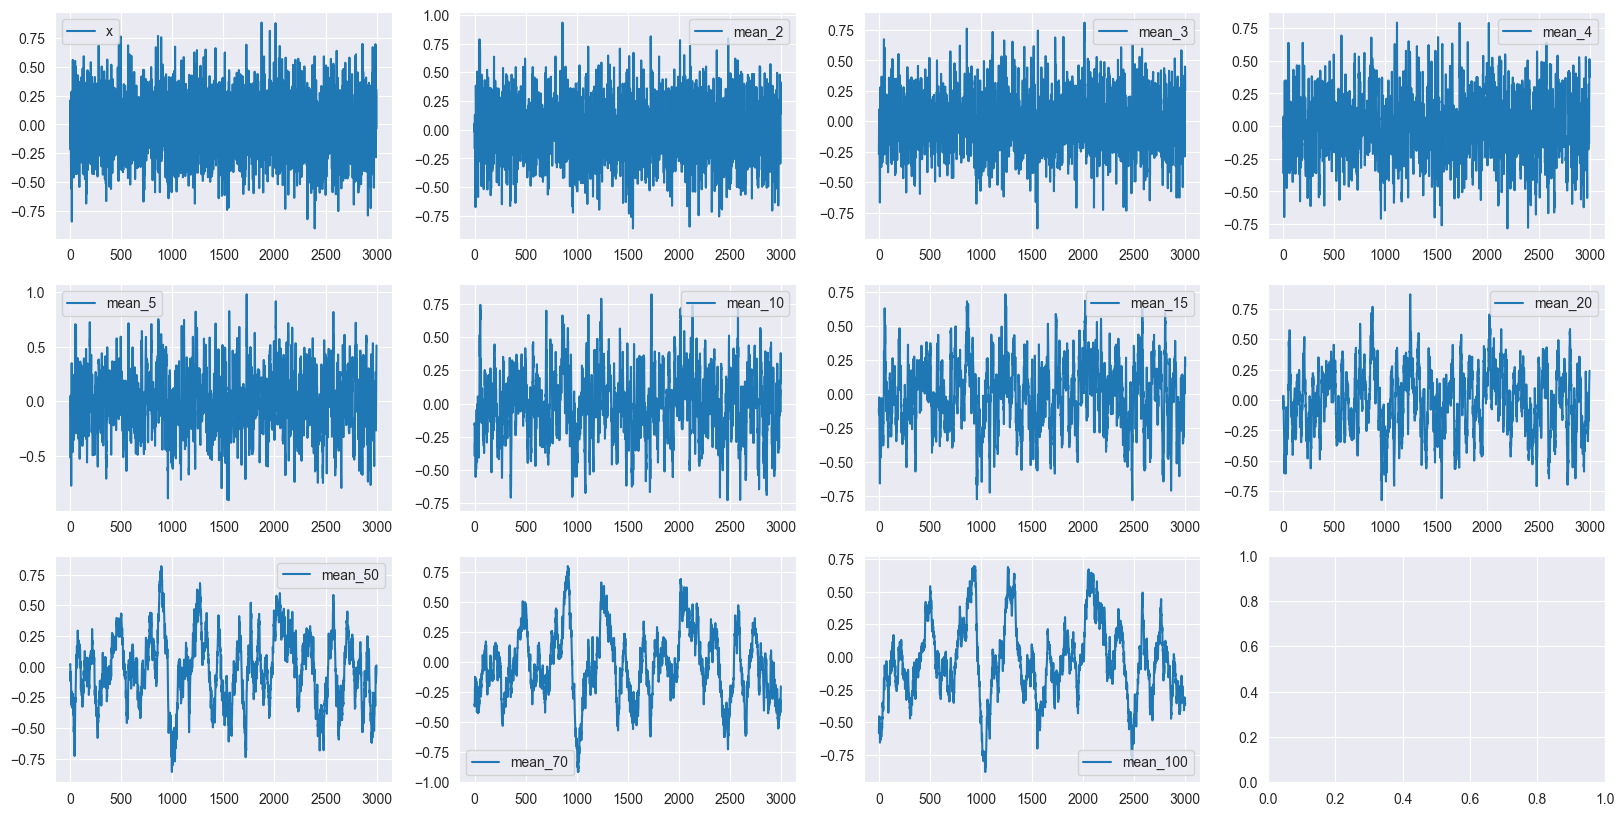

In [3]:
# Построение графиков
N  = 3000     # Какой длины графики строим
ncols = 4
if df.shape[1] % ncols ==0:
    nrows = int(df.shape[1] / ncols)
else:
    nrows = int(df.shape[1]/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков

ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N, ind].values

        axes[i,j].plot(y,label=list(df.columns)[ind])
        axes[i,j].legend()
        ind += 1

        if ind > df.shape[1]-1:
            flag = True
            break
    if flag:
        break

plt.show()


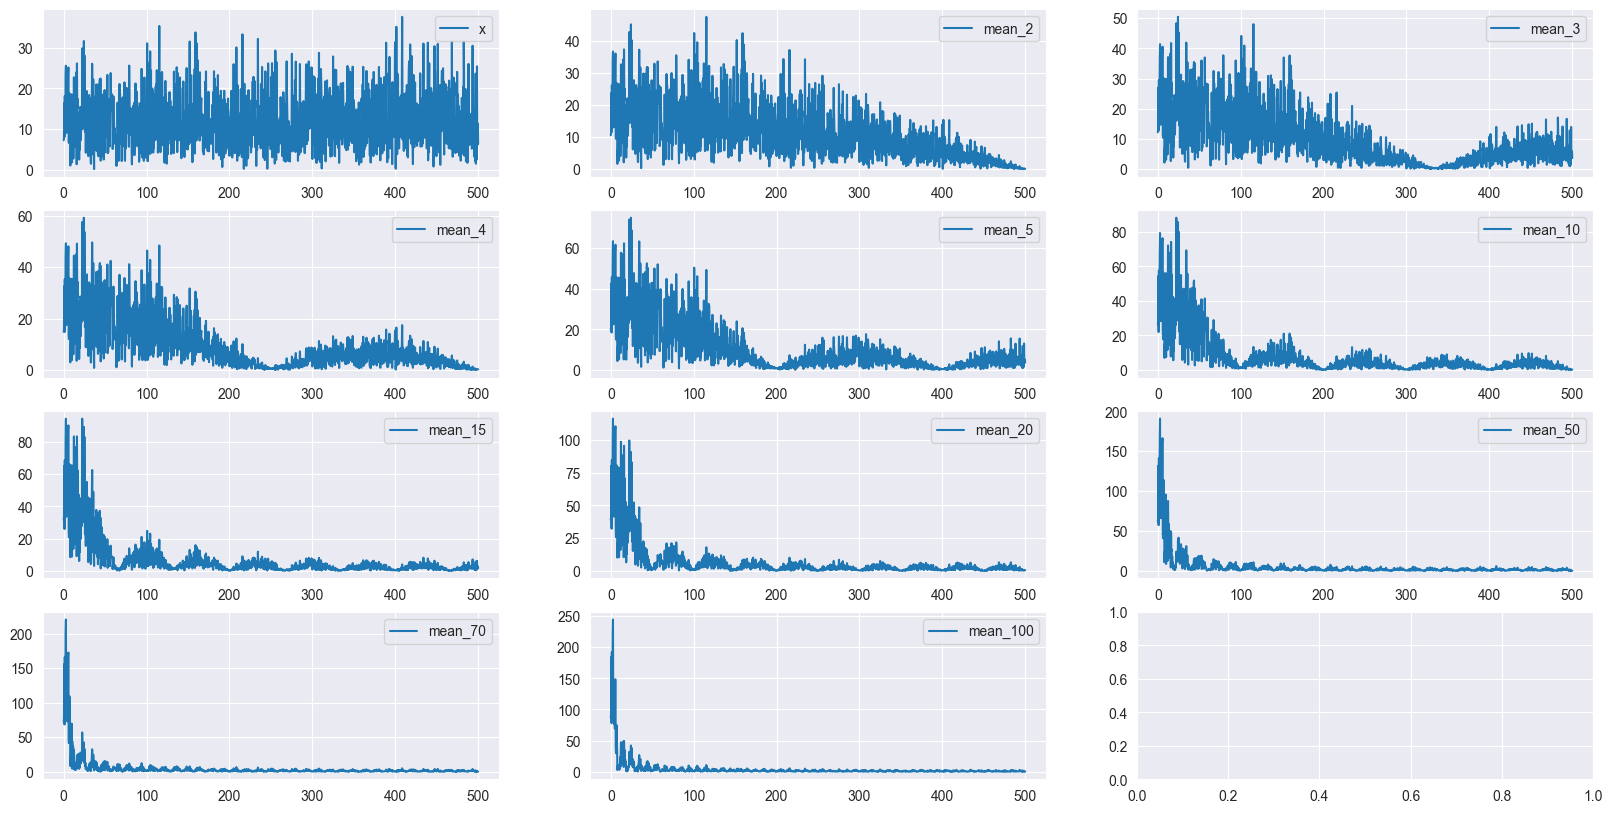

In [4]:
# Построение графиков
N  = 3000     # Какой длины графики берем
ncols = 3
if df.shape[1] % ncols ==0:
    nrows = int(df.shape[1] / ncols)
else:
    nrows = int(df.shape[1]/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков

ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N, ind].values
        yf = rfft(y)
        xf = rfftfreq(N, 1 / SAMPLE_RATE)
        # График с координатами положения (0,0) по отношению к оси
        axes[i,j].plot(xf, np.abs(yf),label=list(df.columns)[ind])
        axes[i,j].legend()
        ind += 1

        if ind > df.shape[1]-1:
            flag = True
            break
    if flag:
        break

plt.show()

# Сравниваем спектр в зависимости от длины сигнала

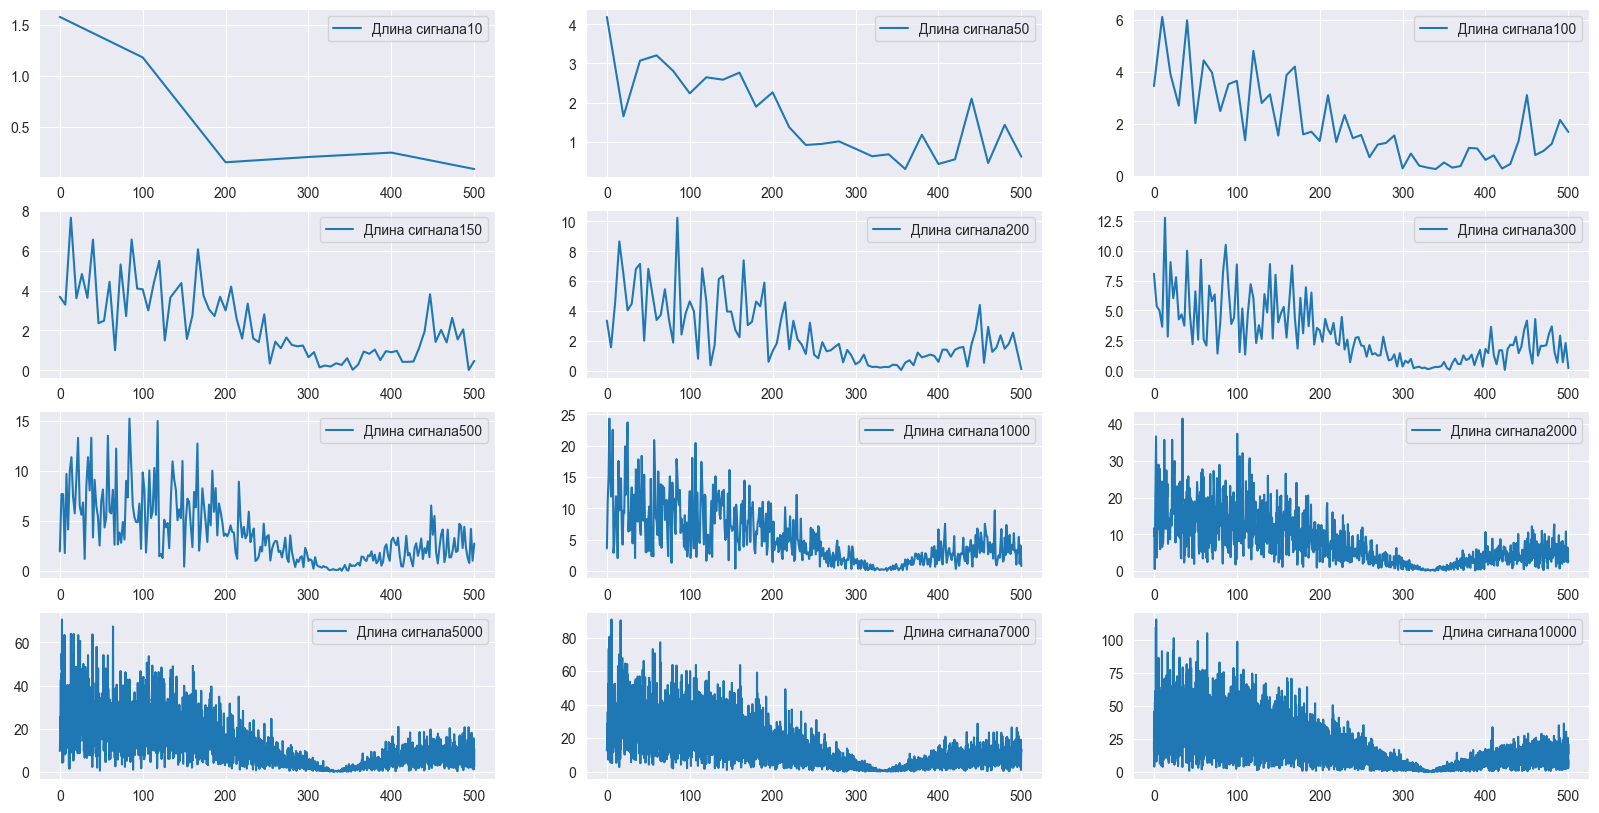

In [5]:
# Для примера возьмем mean 5
# Построение графиков
col_name = 'mean_3'
N = [10, 50, 100, 150, 200, 300, 500, 1000, 2000, 5000, 7000, 10000]
ncols = 3
if len(N) % ncols ==0:
    nrows = int(len(N) / ncols)
else:
    nrows = int(len(N)/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков
ind_col = list(df.columns).index(col_name)
ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N[ind], ind_col].values
        yf = rfft(y)
        xf = rfftfreq(N[ind], 1 / SAMPLE_RATE)
        # График с координатами положения (0,0) по отношению к оси
        axes[i,j].plot(xf, np.abs(yf),label='Длина сигнала'+ str(N[ind]))
        axes[i,j].legend()
        ind += 1

        if ind > len(N)-1:
            flag = True
            break
    if flag:
        break

plt.show()

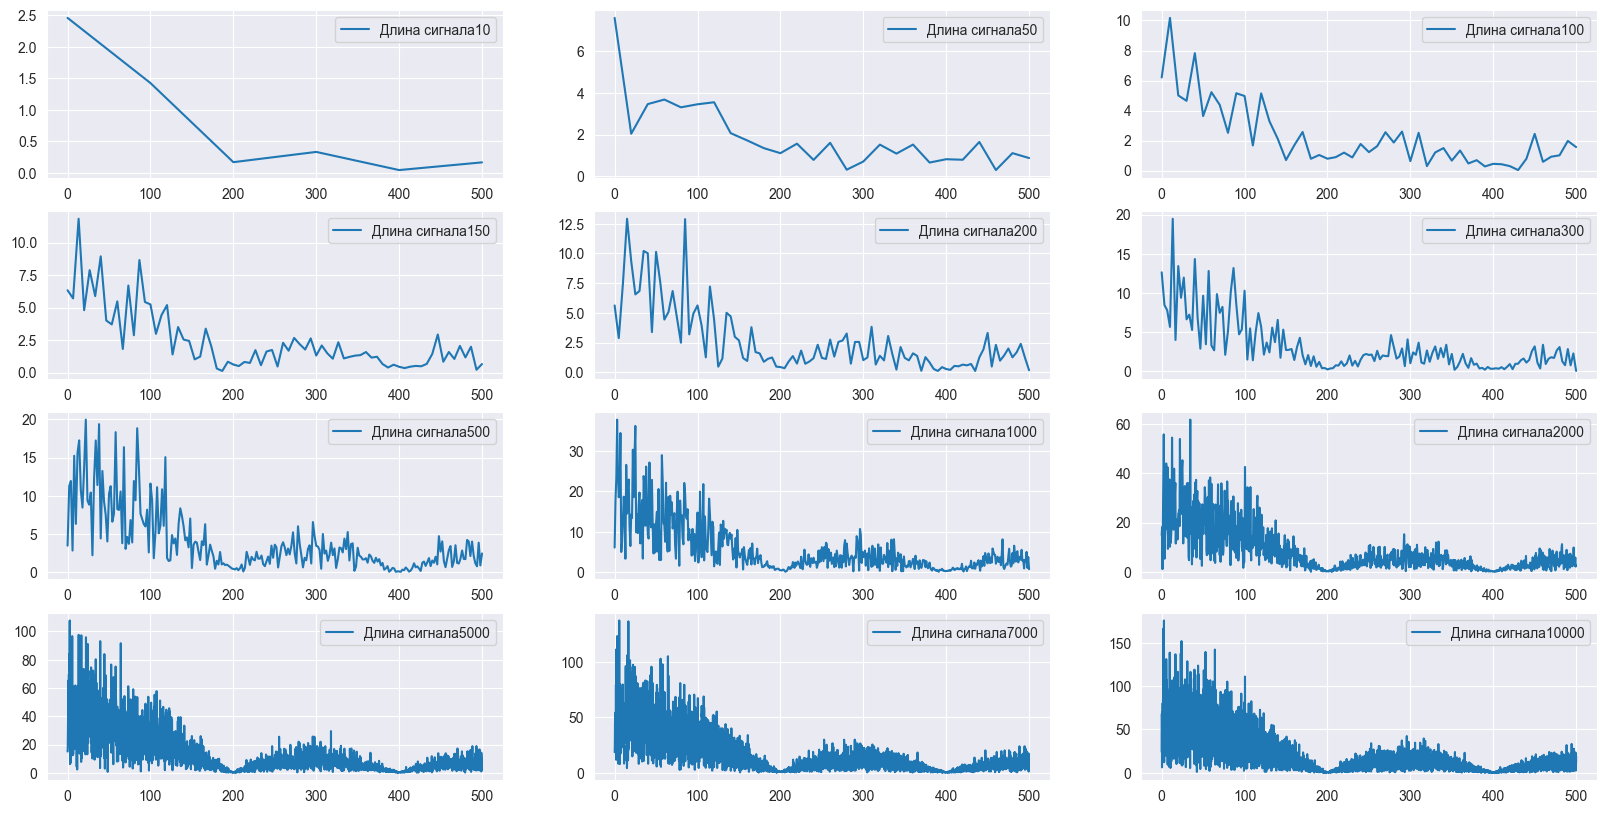

In [6]:
# Для примера возьмем mean 5
# Построение графиков
col_name = 'mean_5'
N = [10, 50, 100, 150, 200, 300, 500, 1000, 2000, 5000, 7000, 10000]
ncols = 3
if len(N) % ncols ==0:
    nrows = int(len(N) / ncols)
else:
    nrows = int(len(N)/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков
ind_col = list(df.columns).index(col_name)
ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N[ind], ind_col].values
        yf = rfft(y)
        xf = rfftfreq(N[ind], 1 / SAMPLE_RATE)
        # График с координатами положения (0,0) по отношению к оси
        axes[i,j].plot(xf, np.abs(yf),label='Длина сигнала'+ str(N[ind]))
        axes[i,j].legend()
        ind += 1

        if ind > len(N)-1:
            flag = True
            break
    if flag:
        break

plt.show()

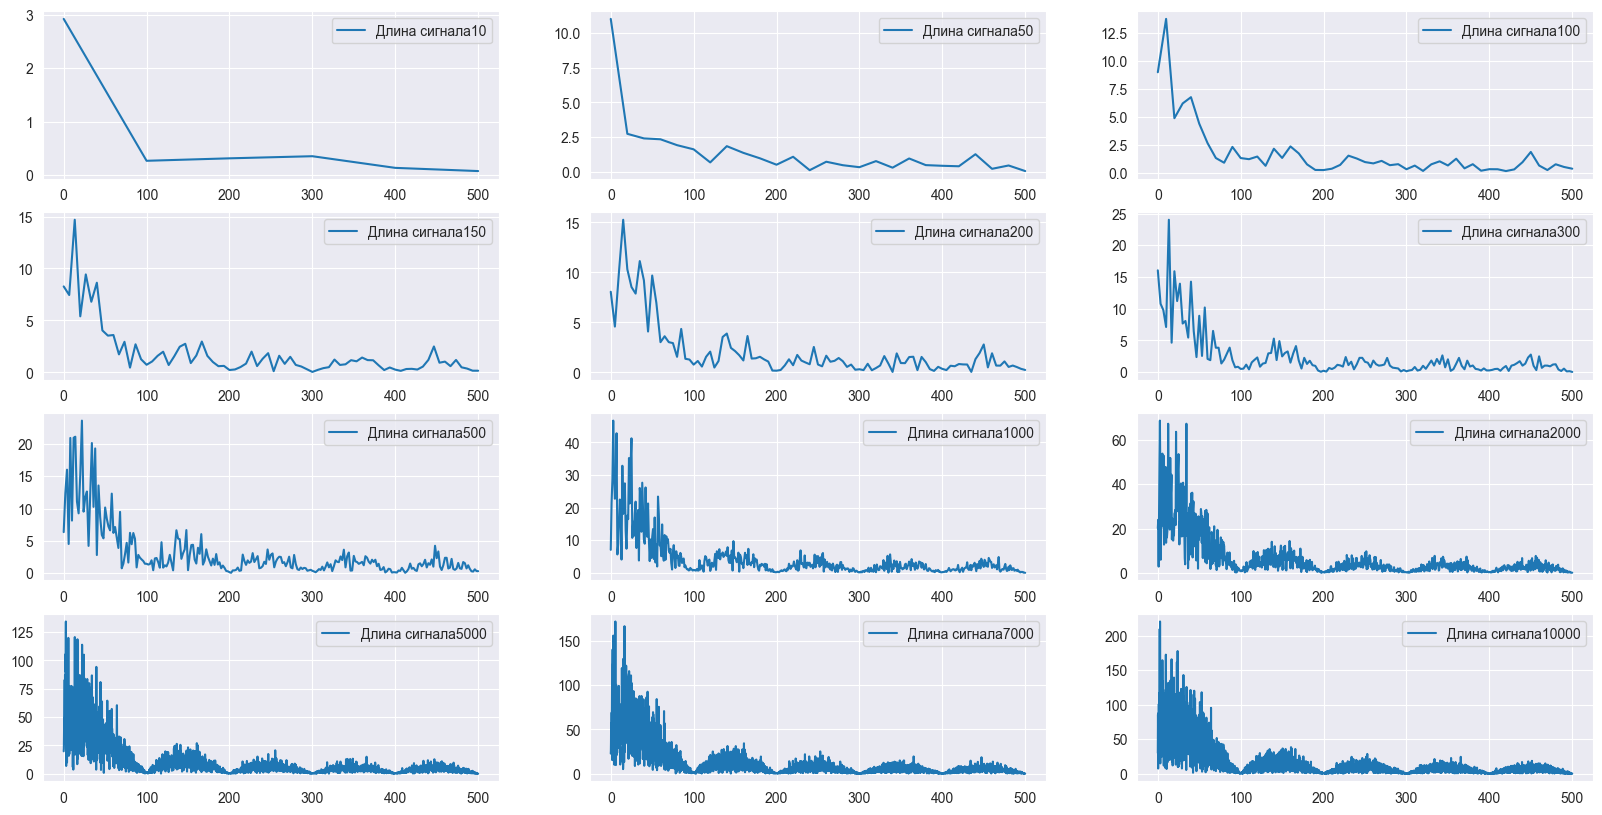

In [7]:
# Для примера возьмем mean 5
# Построение графиков
col_name = 'mean_10'
N = [10, 50, 100, 150, 200, 300, 500, 1000, 2000, 5000, 7000, 10000]
ncols = 3
if len(N) % ncols ==0:
    nrows = int(len(N) / ncols)
else:
    nrows = int(len(N)/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков
ind_col = list(df.columns).index(col_name)
ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N[ind], ind_col].values
        yf = rfft(y)
        xf = rfftfreq(N[ind], 1 / SAMPLE_RATE)
        # График с координатами положения (0,0) по отношению к оси
        axes[i,j].plot(xf, np.abs(yf),label='Длина сигнала'+ str(N[ind]))
        axes[i,j].legend()
        ind += 1

        if ind > len(N)-1:
            flag = True
            break
    if flag:
        break

plt.show()

# Сравниваем перекрытие сигналов и их спектры в зависимости от длины окна и процента перекрытия

1. Задать размер окна
2. Генерация 2-х сигналов размером с окно
3. Конкатенация
4. Рисуем спектр

In [8]:
def visualise_2_signals(mean1 = 2, mean2 = 5, overlaps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], window = 3000, SAMPLE_RATE = 1000):


    SAMPLE_RATE = SAMPLE_RATE  # Гц
    DURATION = int(window/SAMPLE_RATE) * 3  # Секунды
    x1 = np.random.normal(0,1,SAMPLE_RATE * (DURATION +1)) # Первый сигнал
    x2 = np.random.normal(0,1,SAMPLE_RATE * (DURATION +1)) # Второй сигнал

    # Усреднение, обрезание, нормировка, склейка
    x1 = pd.Series(x1).rolling(window = mean1).mean().dropna()
    x2 = pd.Series(x2).rolling(window = mean2).mean().dropna()
    min_len  = min(len(x1), len(x2))
    x1 = x1.values[:min_len]
    x2 = x2.values[:min_len]
    x1 = x1/(np.abs(x1).max())
    x2 = x2/(np.abs(x2).max())

    # Рисование
    ncols = 2
    nrows = 2 + len(overlaps)
    f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(15,30)) # параметры shareх и sharey - если False, то у каждого графика
                                                                             # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                             # общими для всего пространства графиков
    # Только первый сигнал
    axes[0,0].plot(x1[:window],label=f'Первый сигнал, mean1 = {mean1}, window = {window}')
    axes[0,0].legend()
    # Считаем спектр
    y_f = rfft(x1[:window])
    x_f = rfftfreq(window, 1 / SAMPLE_RATE)
    axes[0,1].plot(x_f, np.abs(y_f),label=f'Первый сигнал, mean1 = {mean1}, window = {window}')
    axes[0,1].legend()

    # Только второй сигнал
    axes[1,0].plot(x2[:window],label=f'Второй сигнал, mean2 = {mean2}, window = {window}')
    axes[1,0].legend()
    # Считаем спектр
    y_f = rfft(x2[:window])
    x_f = rfftfreq(window, 1 / SAMPLE_RATE)
    axes[1,1].plot(x_f, np.abs(y_f),label=f'Второй сигнал, mean2 = {mean2}, window = {window}')
    axes[1,1].legend()

    for i in range(len(overlaps)):
        # Смесь сигналов
        len_1 = int(window * (1 - overlaps[i]))
        len_2 = window - len_1
        x = np.concatenate((x1[:len_1],x2[:len_2]))

        # Считаем спектр
        y_f = rfft(x)
        x_f = rfftfreq(window, 1 / SAMPLE_RATE)
        axes[2 +i,0].plot(x,label=f'Смесь 2 сигналов mean1 = {mean1}, mean2 = {mean2}, window = {window}, перекрытие {overlaps[i]}')
        axes[2 +i,0].legend()
        axes[2 +i,1].plot(x_f, np.abs(y_f),label=f'Смесь 2 сигналов mean1 = {mean1}, mean2 = {mean2}, window = {window}, перекрытие {overlaps[i]}')
        axes[2 +i,1].legend()

In [ ]:
visualise_2_signals(mean1 = 2, mean2 = 5, overlaps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], window = 1000, SAMPLE_RATE = 400)

# Через автокорреляцию

In [ ]:
# Функция вычисления коэффициента автокорреляции

def get_corr_coef(data, back_steps): #  шаг смещения >= 0

    # Получение общих частей исходного и смещенного на back_steps рядов,
    # затем вычисление матрицы коэффициентов и отбор коэффициента из нужного места матрицы
    return np.corrcoef(data[back_steps:], data[:len(data) - back_steps])[0, 1]

In [ ]:
# Функция рисования графика коэффициентов автокорреляции данных на разных шагах смещения

def make_autocorr(data, steps_max, plotting = False):
    # Задание последовательности шагов смещения от 0 до steps_max
    # и расчет коэффициентов автокорреляции для этих смещений
    steps = range(0, steps_max + 1)
    coefs = [get_corr_coef(data, i) for i in steps]

    if plotting:
        # Рисование графика коэффициентов автокорреляции
        plt.plot(steps, coefs)
        plt.xticks(steps)
        plt.xlabel('Шаги смещения')
        plt.ylabel('Коэффициент автокорреляции')
        plt.show()
    return np.array(coefs)

In [ ]:
def acf(mean1 = 2, mean2 = 5, overlaps = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1], window = 3000, n_steps_part_window = 0.5):


    x1 = np.random.normal(0,1,int(window * 1.5)) # Первый сигнал
    x2 = np.random.normal(0,1,int(window * 1.5)) # Второй сигнал
    N_steps = int(n_steps_part_window * window)

    # Усреднение, обрезание, нормировка, склейка
    x1 = pd.Series(x1).rolling(window = mean1).mean().dropna()
    x2 = pd.Series(x2).rolling(window = mean2).mean().dropna()
    min_len  = min(len(x1), len(x2))
    x1 = x1.values[:min_len]
    x2 = x2.values[:min_len]
    x1 = x1/(np.abs(x1).max())
    x2 = x2/(np.abs(x2).max())

    # Рисование
    ncols = 2
    nrows = len(overlaps)
    f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(15,30)) # параметры shareх и sharey - если False, то у каждого графика
                                                                             # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                             # общими для всего пространства графиков
    for i in range(len(overlaps)):
        # Смесь сигналов
        len_1 = int(window * (1 - overlaps[i]))
        len_2 = window - len_1
        x = np.concatenate((x1[:len_1],x2[:len_2]))
        x = x[:window]

        # Считаем спектр
        acf = make_autocorr(x, N_steps)
        axes[i,0].plot(x, label=f'Сшивка двух сигналов')
        axes[i,0].legend()
        axes[i,1].plot(acf,marker= "*",label=f'АКФ сигнала, перекрытие {overlaps[i]}')
        axes[i, 1].axhline(0.5, c = 'k', linestyle = 'dashed')
        axes[i, 1].text(10, 0.6, 'Падение АКФ в 2 раза')
        axes[i,1].legend()

In [ ]:
acf(mean1 = 2, mean2 = 5, overlaps = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,1], window = 300, n_steps_part_window = 0.05)

In [ ]:
acf(mean1 = 2, mean2 = 10, overlaps = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,1], window = 300, n_steps_part_window = 0.05)